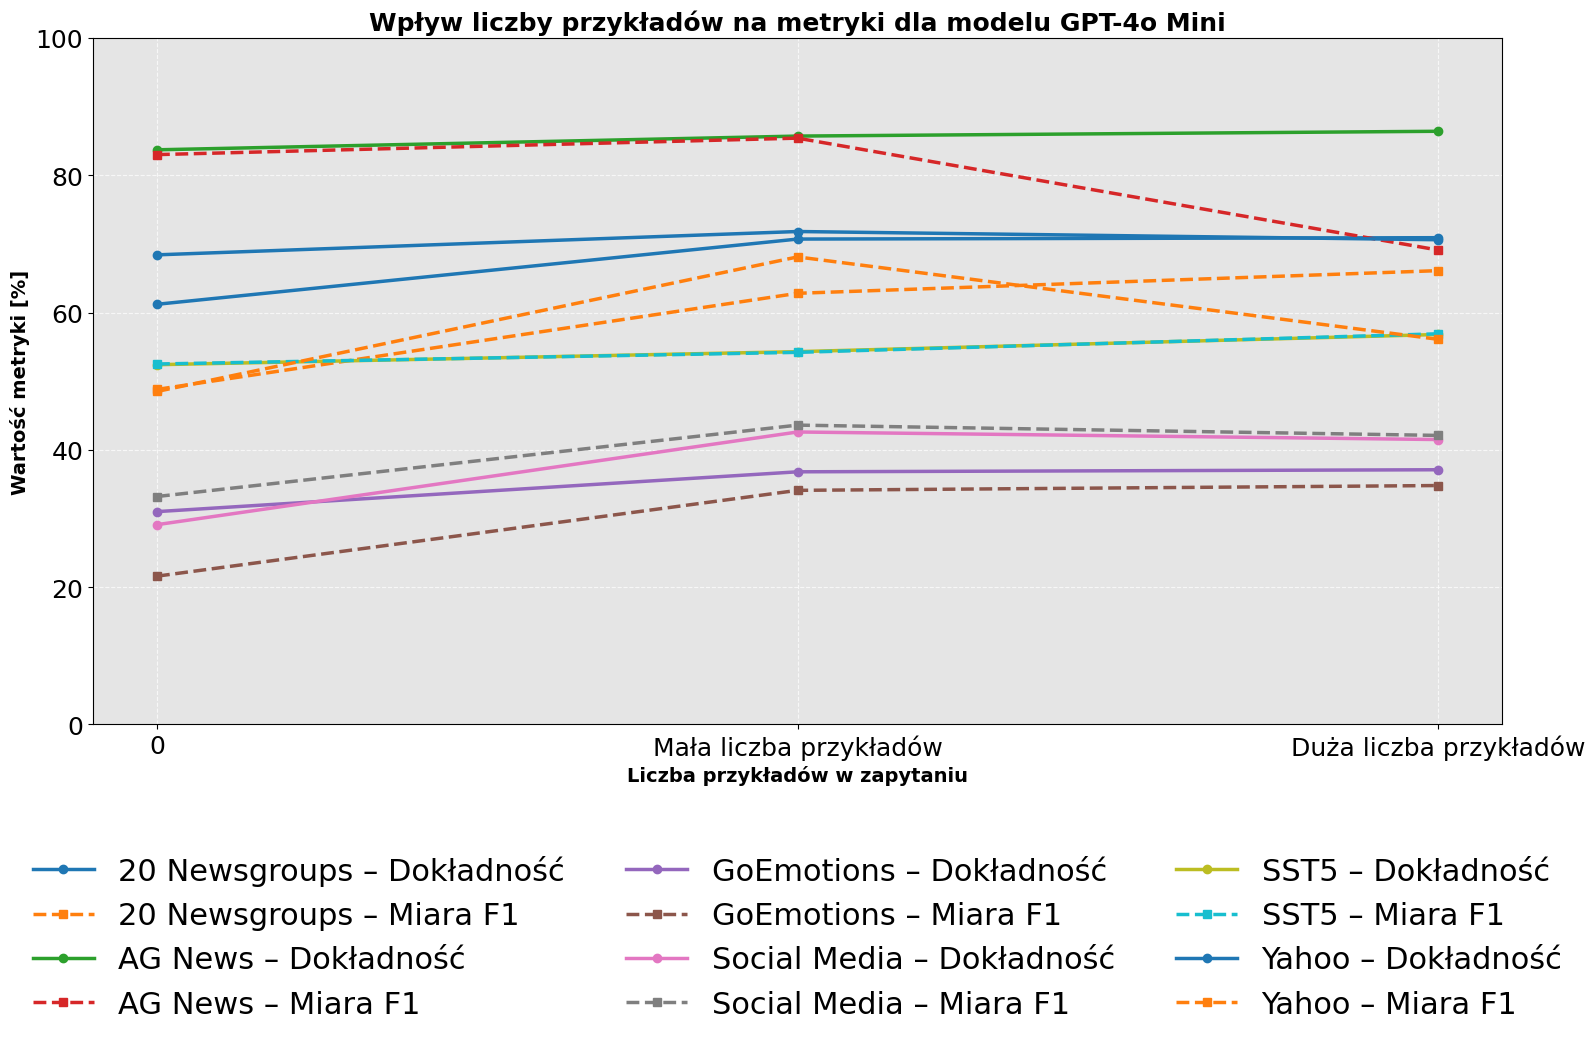

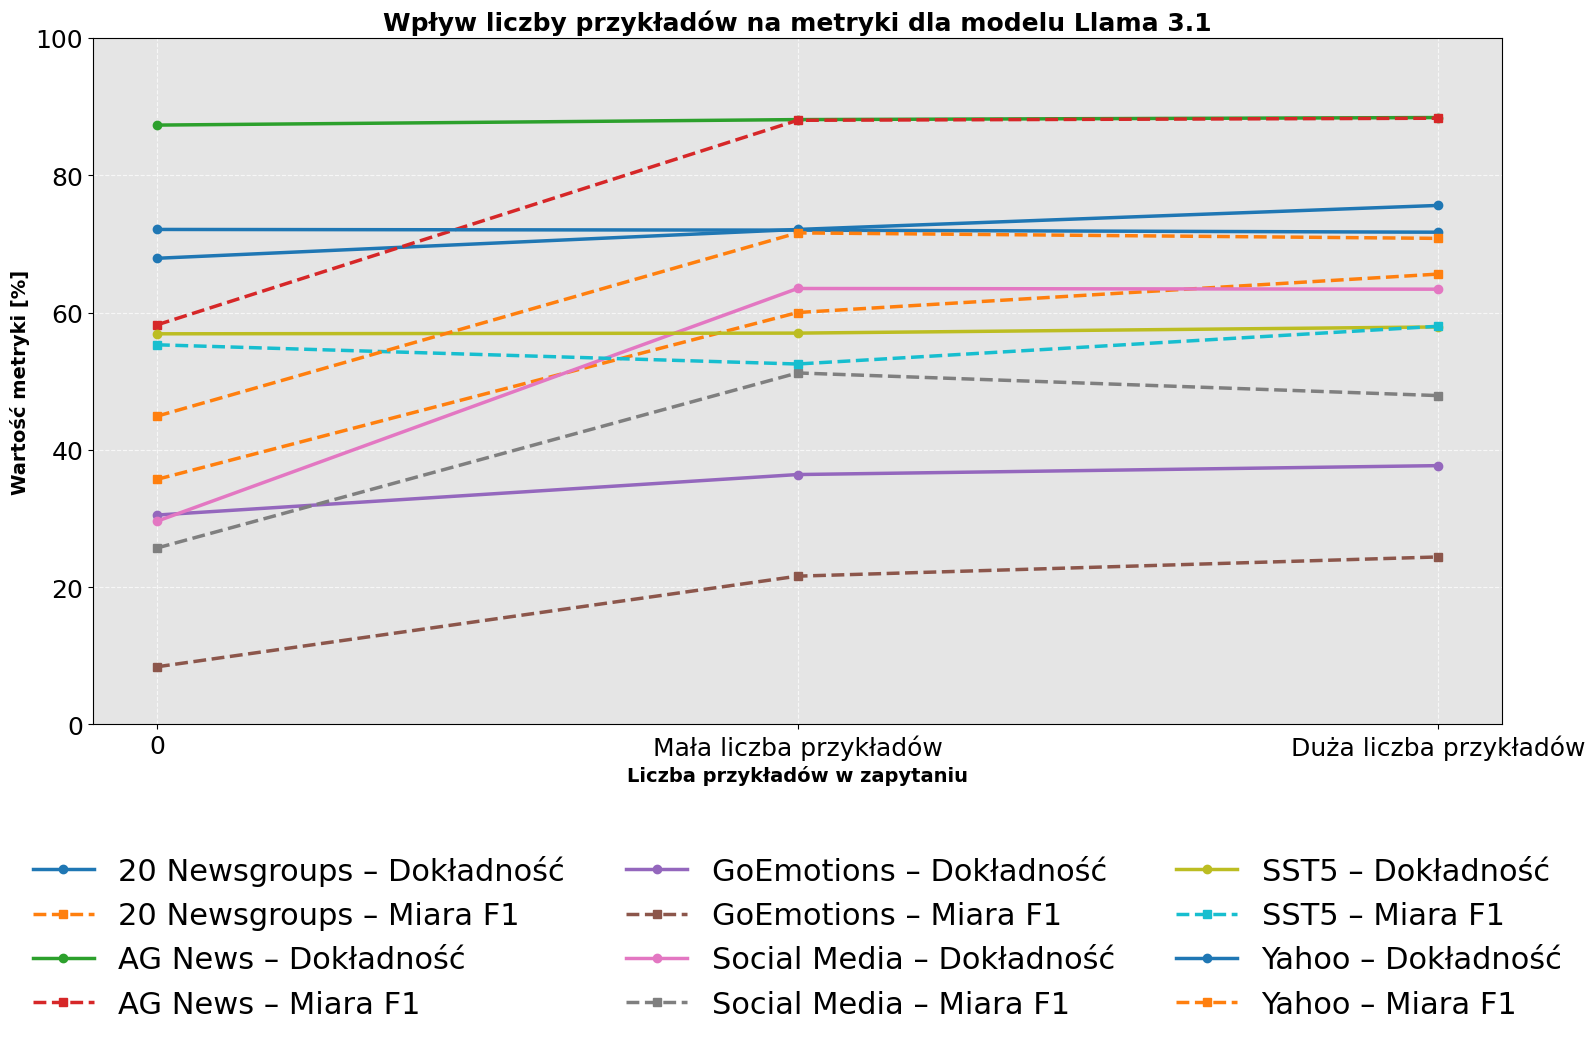

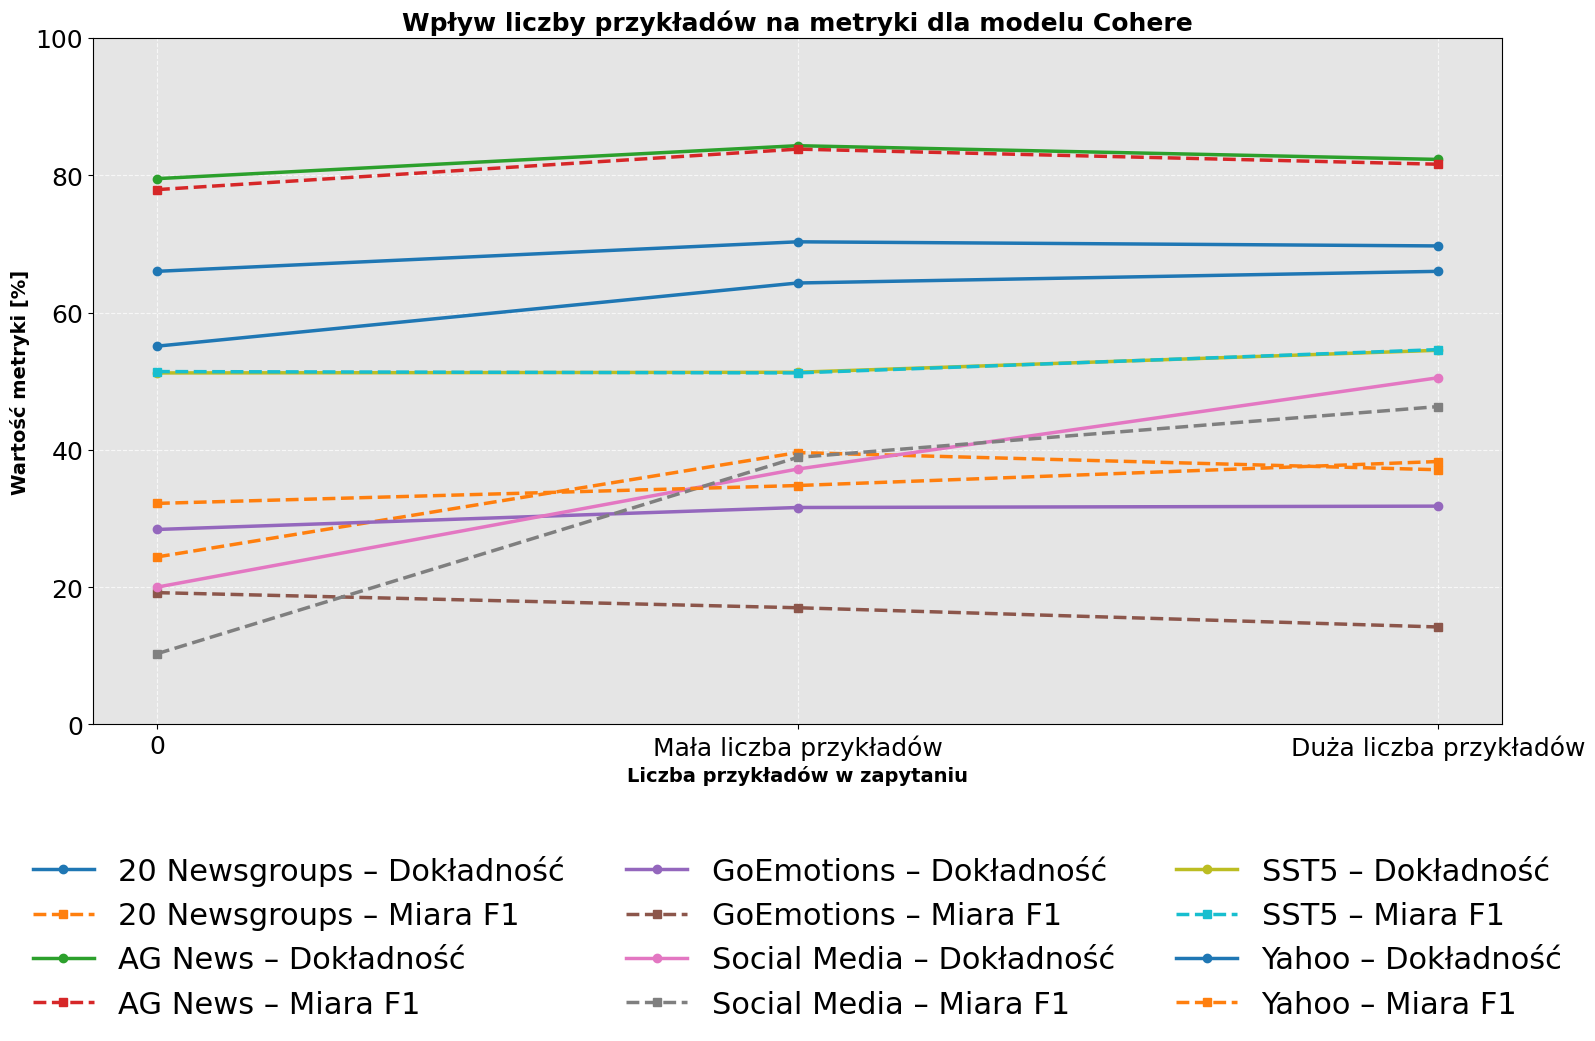

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Ustawienie czcionki obsługującej polskie znaki
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Czcionka obsługująca polskie znaki
matplotlib.rcParams['axes.unicode_minus'] = False  # Poprawne wyświetlanie znaku minus

# Dane: metryki dla każdego modelu i zbioru danych
models = ['GPT-4o Mini', 'Llama 3.1', 'Cohere']
datasets = ['20 Newsgroups', 'AG News', 'GoEmotions', 'Social Media', 'SST5', 'Yahoo']
example_counts = ['0', 'Mała liczba przykładów', 'Duża liczba przykładów']

# Struktura: metryki[model][zbiór danych][liczba przykładów] = (dokładność, miara F1)
metrics = {
    'GPT-4o Mini': {
        '20 Newsgroups': [(61.2, 48.8), (70.7, 62.8), (70.9, 66.1)],
        'AG News': [(83.7, 83.0), (85.7, 85.4), (86.4, 69.1)],
        'GoEmotions': [(31.0, 21.6), (36.8, 34.1), (37.1, 34.8)],
        'Social Media': [(29.1, 33.2), (42.6, 43.6), (41.5, 42.1)],
        'SST5': [(52.4, 52.5), (54.3, 54.2), (56.8, 56.9)],
        'Yahoo': [(68.4, 48.5), (71.8, 68.1), (70.6, 56.1)],
    },
    'Llama 3.1': {
        '20 Newsgroups': [(67.9, 35.7), (72.1, 60.0), (75.6, 65.6)],
        'AG News': [(87.3, 58.2), (88.1, 88.0), (88.4, 88.3)],
        'GoEmotions': [(30.5, 8.4), (36.4, 21.6), (37.7, 24.4)],
        'Social Media': [(29.6, 25.7), (63.5, 51.2), (63.4, 47.9)],
        'SST5': [(56.9, 55.3), (57.0, 52.5), (57.9, 58.0)],
        'Yahoo': [(72.1, 44.9), (72.0, 71.6), (71.7, 70.8)],
    },
    'Cohere': {
        '20 Newsgroups': [(55.1, 24.4), (64.3, 39.6), (66.0, 37.1)],
        'AG News': [(79.5, 77.9), (84.3, 83.8), (82.3, 81.6)],
        'GoEmotions': [(28.4, 19.2), (31.6, 17.0), (31.8, 14.2)],
        'Social Media': [(20.0, 10.3), (37.2, 38.9), (50.5, 46.3)],
        'SST5': [(51.2, 51.4), (51.3, 51.2), (54.5, 54.6)],
        'Yahoo': [(66.0, 32.2), (70.3, 34.8), (69.7, 38.3)],
    }
}

# Ustawienia stylu wykresów
plt.rcParams.update({
    'font.size': 18,
    'figure.figsize': (19, 19),
    'lines.linewidth': 2.5,
    'axes.labelweight': 'bold',
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'legend.fontsize': 22
})

plt.rcParams['axes.facecolor'] = '#E5E5E5'  # szare tło
plt.rcParams['grid.color'] = 'white'        # białe linie siatki


# Generowanie wykresów dla każdego modelu
for model in models:
    fig, ax = plt.subplots(figsize=(17, 11))
    for dataset in datasets:
        accuracies = [metrics[model][dataset][i][0] for i in range(3)]
        f1_scores = [metrics[model][dataset][i][1] for i in range(3)]
        ax.plot(example_counts, accuracies, marker='o', label=f'{dataset} – Dokładność')
        ax.plot(example_counts, f1_scores, marker='s', linestyle='--', label=f'{dataset} – Miara F1')
    ax.set_title(f'Wpływ liczby przykładów na metryki dla modelu {model}', fontsize=18, weight='bold')
    ax.set_xlabel('Liczba przykładów w zapytaniu', fontsize=14, weight='bold')
    ax.set_ylabel('Wartość metryki [%]', fontsize=14, weight='bold')
    ax.set_ylim(0, 100)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=3,
        frameon=False
    )
    plt.tight_layout()
    plt.savefig(f'liczba_przykladow_{model}.png', format='png')
    plt.show()


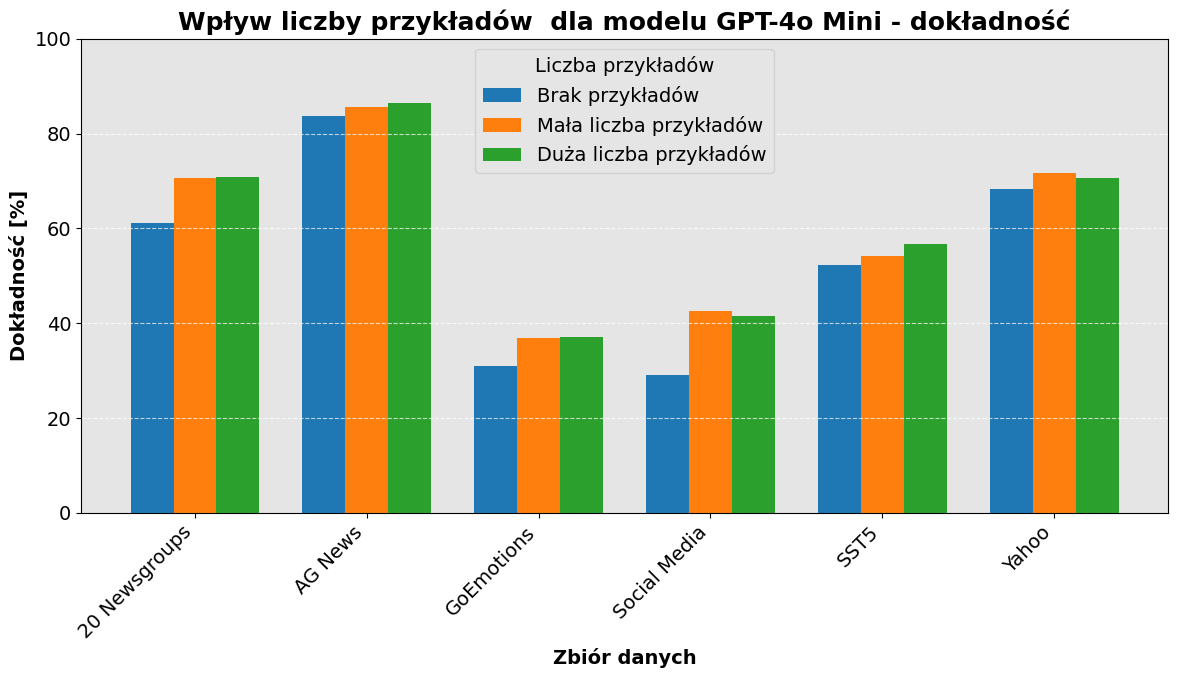

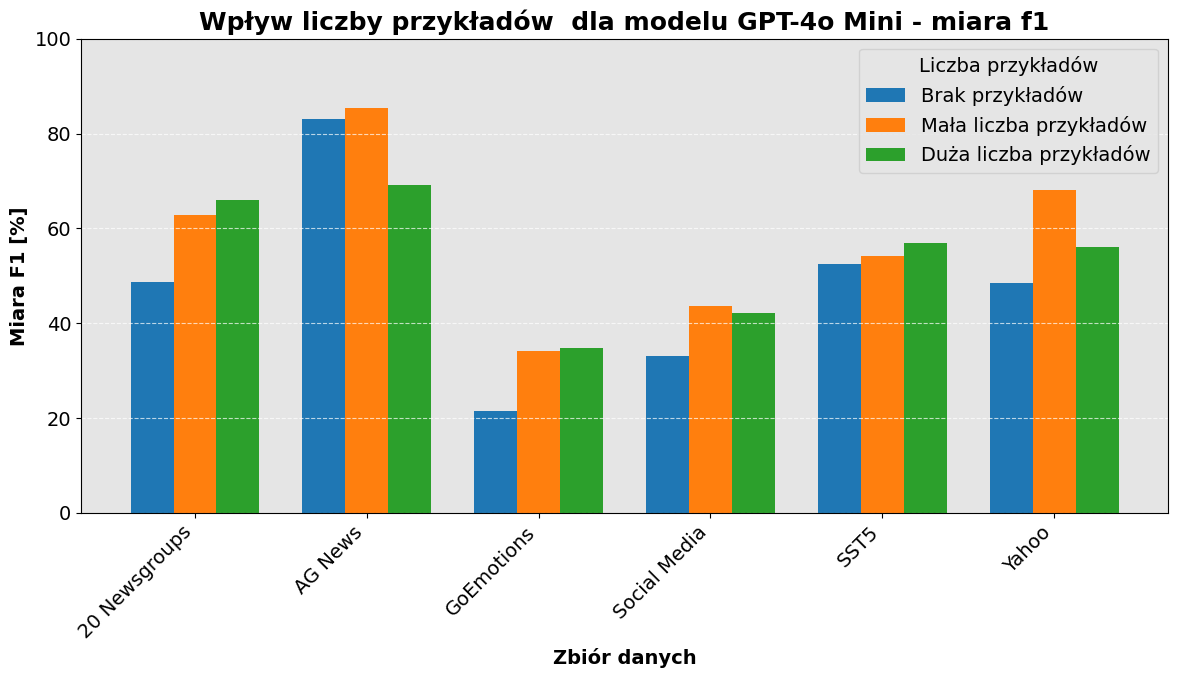

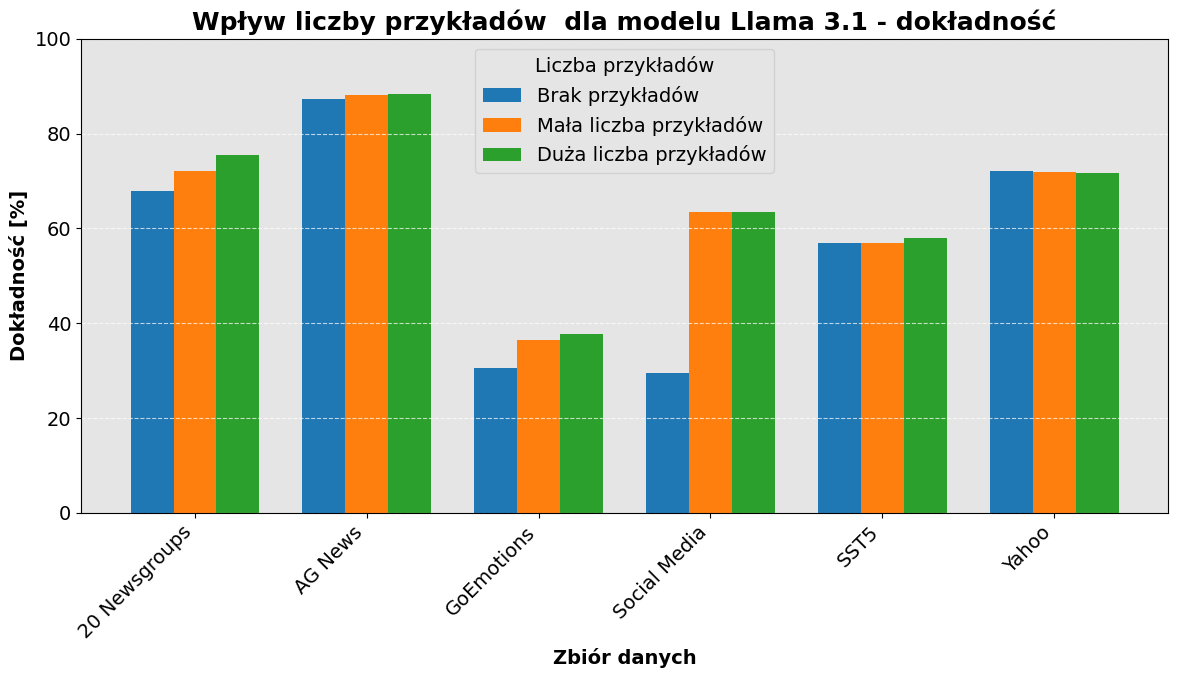

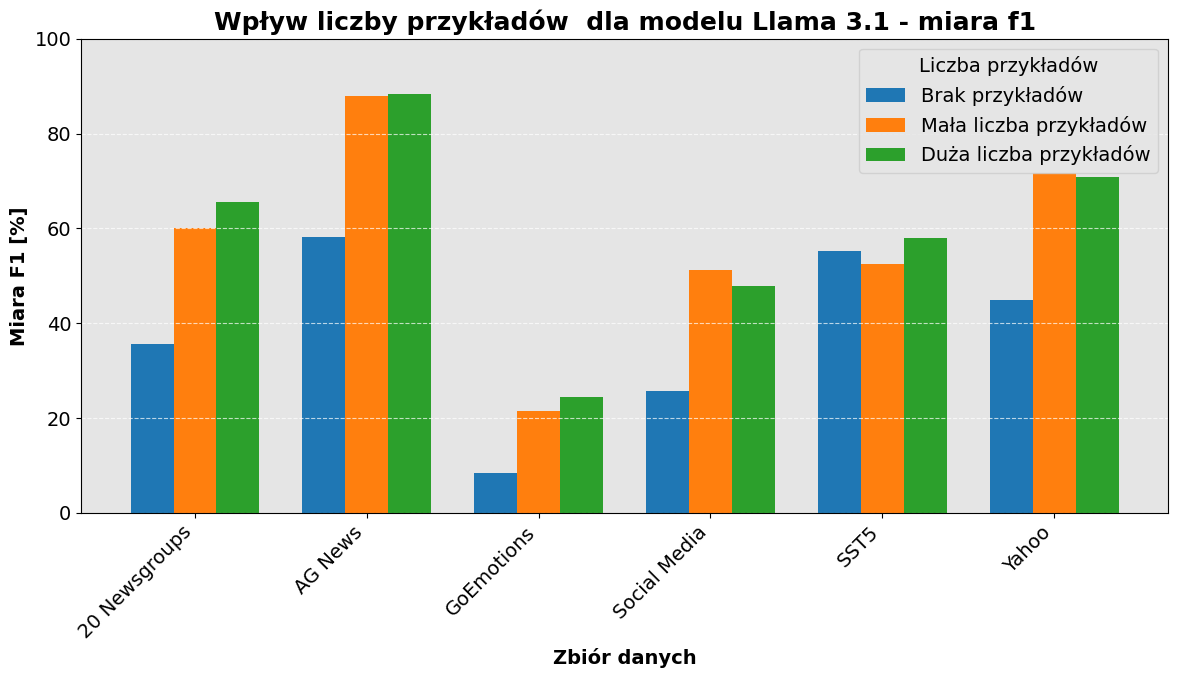

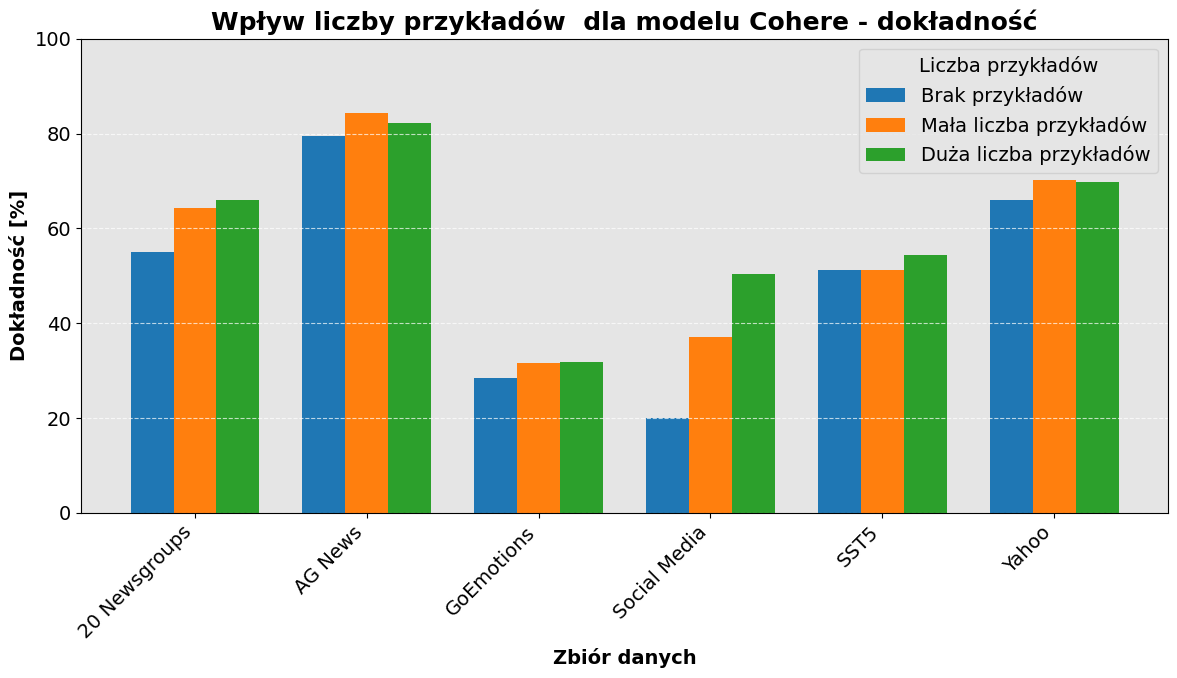

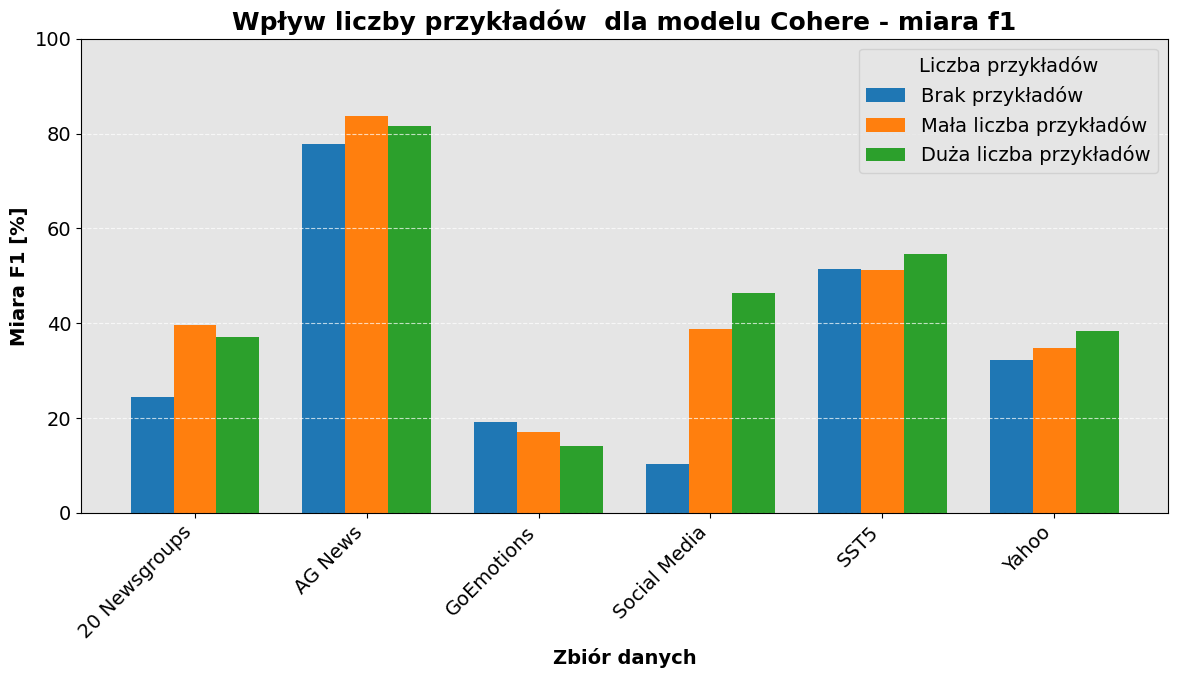

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.size': 14,
    'figure.figsize': (12, 7),
    'axes.labelweight': 'bold',
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'legend.fontsize': 14
})

example_counts = ['Brak', 'Mała liczba', 'Duża liczba']
width = 0.25  # szerokość słupków

for model in models:
    for metric_idx, metric_name in enumerate(['Dokładność', 'Miara F1']):
        labels = datasets
        x = np.arange(len(labels))

        data = []
        for ex_i in range(3):
            vals = [metrics[model][dataset][ex_i][metric_idx] for dataset in datasets]
            data.append(vals)

        fig, ax = plt.subplots()
        for i in range(3):
            ax.bar(x + (i - 1) * width, data[i], width, label=f'{example_counts[i]} przykładów')

        ax.set_xlabel('Zbiór danych', weight='bold')
        ax.set_ylabel(f'{metric_name} [%]', weight='bold')
        ax.set_title(f'Wpływ liczby przykładów  dla modelu {model} - {metric_name.lower()}', weight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45, ha='right')
        ax.set_ylim(0, 100)
        ax.legend(title='Liczba przykładów')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()

        # Zapis do pliku PNG, nazwa bez polskich znaków dla pewności
        filename = f'wyniki_number{model.replace(" ", "_").replace(".", "")}_{metric_name.replace(" ", "_")}.png'
        plt.savefig(filename, format='png', dpi=300)

        plt.show()

